# Análise exploratória de dados do Spotify - Clusterização de Artistas

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

## Lendo a base de dados

Base de dados utilizada: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [2]:
artists = pd.read_csv("data_by_artist_o.csv")
artists.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [3]:
artists.drop(columns = ["genres", "artists", "mode", "key", "count"], inplace = True)
artists.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333
1,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923
2,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143
3,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852
4,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000


In [4]:
artists.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

## Normalizando os valores do dataset

Importante normalizá-los, pois cada um está dentro de um intervalo diferente.

In [5]:
values = Normalizer().fit_transform(artists.values)
values

array([[2.35744025e-06, 1.86651031e-06, 9.99999876e-01, ...,
        4.69474172e-04, 1.55601710e-06, 1.53138182e-04],
       [3.00243108e-06, 1.53763136e-06, 9.99999929e-01, ...,
        3.58688898e-04, 9.35900047e-07, 1.06435954e-04],
       [2.60419372e-06, 1.05887663e-06, 9.99999966e-01, ...,
        2.35242170e-04, 1.07885544e-06, 1.05974528e-04],
       ...,
       [4.49903814e-06, 3.26961348e-06, 9.99999749e-01, ...,
        6.84983243e-04, 4.24596724e-06, 1.31742668e-04],
       [1.20508578e-06, 1.11652305e-06, 9.99999793e-01, ...,
        6.33669530e-04, 1.11336009e-06, 1.10703418e-04],
       [2.38968719e-06, 1.88061650e-06, 9.99999943e-01, ...,
        3.02829743e-04, 7.44673648e-07, 1.30423068e-04]])

## Algoritmo de clusterização

In [6]:
SEED = 4242564

In [7]:
def clustering(n_clusters, dataset):
    
    # Kmeans
    kmeans = KMeans(n_clusters, n_init = 10, max_iter = 300, random_state = SEED)
    labels = kmeans.fit_predict(dataset)
    
    # Silhoette
    silhouette = metrics.silhouette_score(dataset, labels, metric = "euclidean")
    
    # Davies Bouldin Score
    dbs = metrics.davies_bouldin_score(dataset, labels)
    
    # Calinski Harabasz Score
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    
    print("Silhouette: {} | Daniel Bouldin: {} | Calinski Harabasz: {}".format(silhouette, dbs, calinski))

In [8]:
for i in range(3, 11):
    
    print("Número de clusters = " + str(i))
    clustering(i, values)
    print("=============")

Número de clusters = 3
Silhouette: 0.41374884472398954 | Daniel Bouldin: 0.8749312245310885 | Calinski Harabasz: 19000.05842055269
Número de clusters = 4
Silhouette: 0.36401352094842326 | Daniel Bouldin: 0.8816362645651695 | Calinski Harabasz: 19616.92503558094
Número de clusters = 5
Silhouette: 0.3666758098585337 | Daniel Bouldin: 0.868184946688676 | Calinski Harabasz: 18801.416072412994
Número de clusters = 6
Silhouette: 0.3632798828578113 | Daniel Bouldin: 0.8508508399916447 | Calinski Harabasz: 19135.541972637984
Número de clusters = 7
Silhouette: 0.35595502923661965 | Daniel Bouldin: 0.870115340350998 | Calinski Harabasz: 19066.376475743426
Número de clusters = 8
Silhouette: 0.35229109446367673 | Daniel Bouldin: 0.8780537140386584 | Calinski Harabasz: 18654.799555413392
Número de clusters = 9
Silhouette: 0.34997353817318216 | Daniel Bouldin: 0.8565152032912239 | Calinski Harabasz: 18677.673606040124
Número de clusters = 10
Silhouette: 0.34058279943650216 | Daniel Bouldin: 0.881727

- **Silhoette:** varia entre -1 e 1. Quanto mais próximo de 1, mais compactos e separados estão os clusters. Um valor positivo já é um indicativo de boa criação dos clusters, e isso o torna o índice mais popular e utilizado.

- **Daniel Bouldin:** quanto mais próximo de 0, melhor, e quanto mais próximo de 1, pior. Seu cálculo sempre pega o pior caso, pois se mesmo assim obtermos um bom resultado, podemos dizer então que temos uma boa clusterização.

- **Calinski Harabasz:** quanto mais alto, melhor.



Com base nos dados acima, escolheremos 4 como o número de clusters a ser criado e analisado.

In [9]:
n_clusters = 4

### Criação dos rótulos (labels) dos clusters

Como temos 4 clusters, os rótulos serão numerados de 0 à 3.

In [10]:
kmeans = KMeans(n_clusters, n_init = 10, max_iter = 300, random_state = SEED)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3]), array([13411,  2210, 12925,   134], dtype=int64))

In [11]:
artists["cluster"] = labels
artists.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster
0,0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,0
1,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,0
2,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,0


### Verificando o número de clusters decidido

In [12]:
random_data = np.random.rand(artists.shape[0], artists.shape[1])
clustering(n_clusters, random_data)

Silhouette: 0.05327871201789122 | Daniel Bouldin: 3.3375537131917588 | Calinski Harabasz: 1452.7136078316832


Nossos valores para o dataset values são melhores do que para o dataset com valores aleatórios gerados.

In [13]:
set1, set2, set3 = np.array_split(values, 3)
clustering(n_clusters, set1)
clustering(n_clusters, set2)
clustering(n_clusters, set3)

Silhouette: 0.365009594181017 | Daniel Bouldin: 0.8700992432557624 | Calinski Harabasz: 6953.972622280768
Silhouette: 0.3642731415704217 | Daniel Bouldin: 0.8980321796719848 | Calinski Harabasz: 6249.259362412726
Silhouette: 0.3618338000906356 | Daniel Bouldin: 0.882252364503899 | Calinski Harabasz: 6451.607202889119


Mesmo dividindo o dataset values em 3, os valores obtidos para o algoritmo de clusterização não diferem tanto. Temos então indicativos que nossos clusters são estáveis.

## Extraindo informações dos clusters

In [14]:
def scatter(dataset, x, y, xlabel, ylabel, title):
    
    sns.lmplot(data = dataset, x = x, y = y, hue = "cluster", height = 5, aspect = 1.6,
               fit_reg = False, legend = True, legend_out = True,
              scatter_kws = {"s": 10})
    
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.title(title, fontsize = 20)
    
    plt.show()

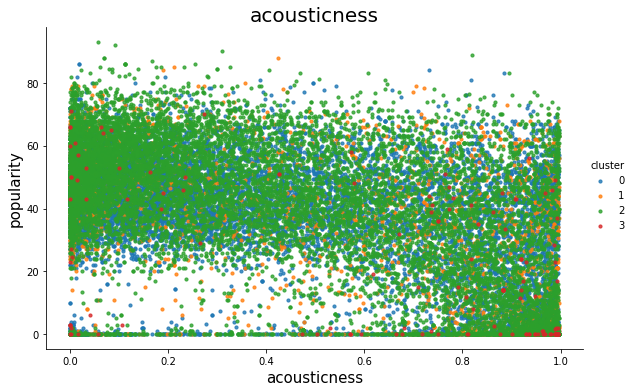

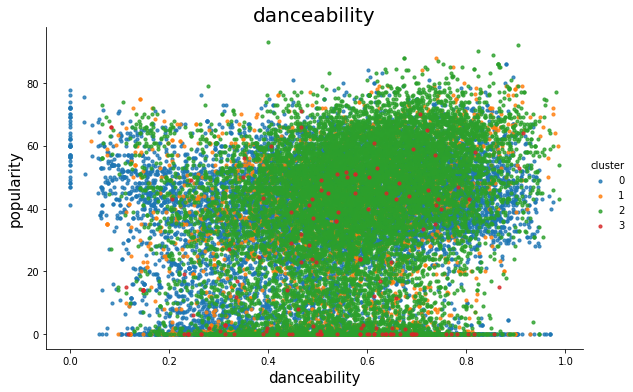

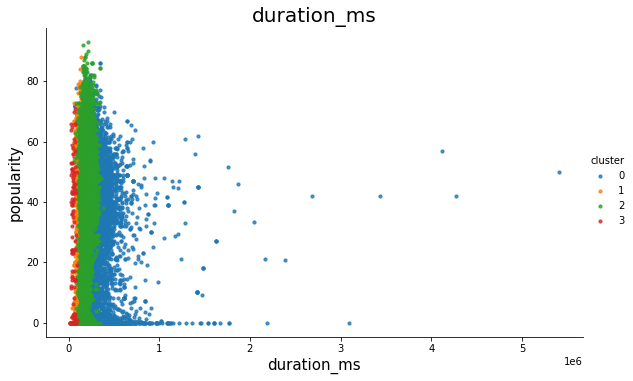

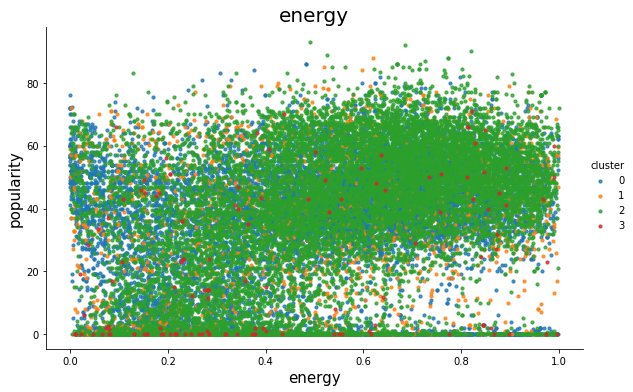

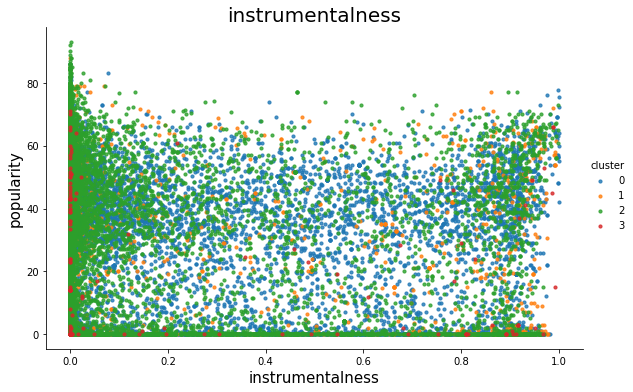

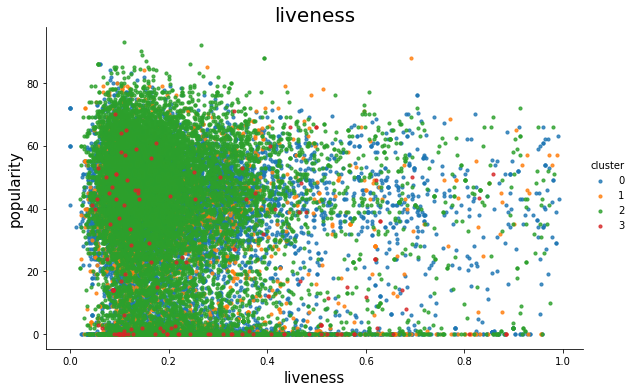

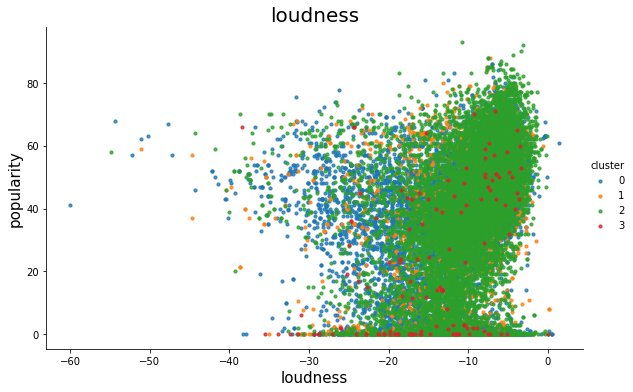

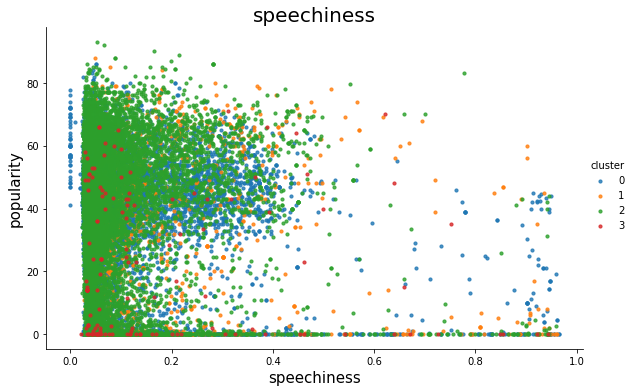

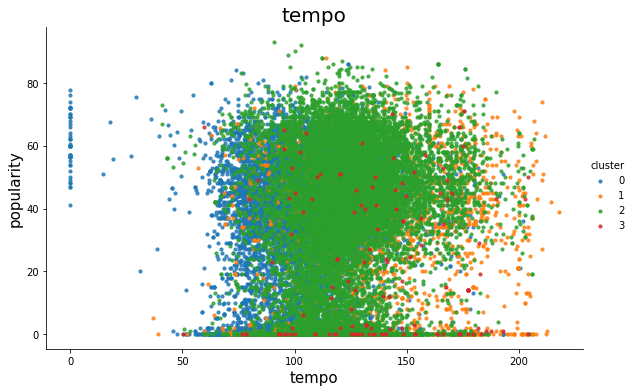

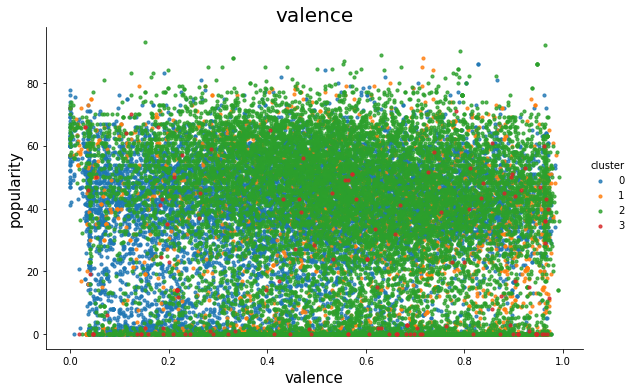

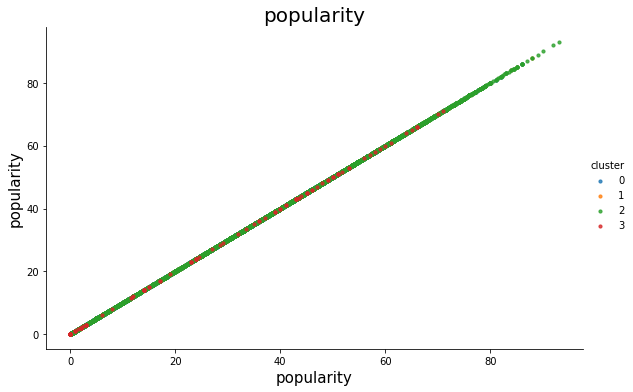

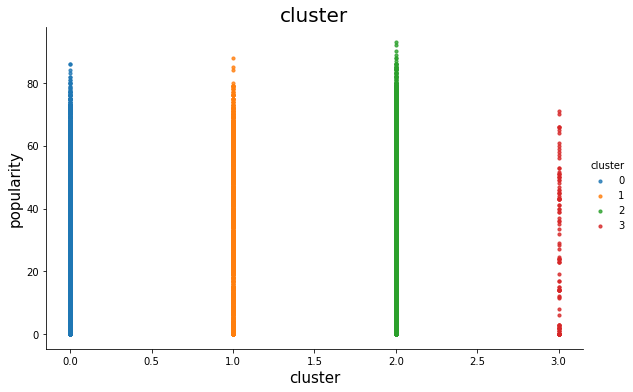

In [15]:
for column in artists.columns:
    scatter(artists, column, "popularity", column, "popularity", column)

Visualmente até conseguimos tirar algumas informações, mas não parece ser o método ideal. Para isso vamos analisar as estatísticas descritivas de cada cluster.

In [16]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.96857940e-06,  1.96515452e-06,  9.99999911e-01,
         1.72846849e-06,  7.76830881e-07,  7.64689972e-07,
        -4.44927844e-05,  3.47216342e-07,  3.79199291e-04,
         1.75231837e-06,  1.16307635e-04],
       [ 5.22946199e-06,  4.51683293e-06,  9.99999314e-01,
         3.64362540e-06,  1.69699212e-06,  1.81148868e-06,
        -1.08932372e-04,  1.13482436e-06,  1.09396555e-03,
         4.84145305e-06,  2.44859011e-04],
       [ 2.61148785e-06,  2.97334825e-06,  9.99999767e-01,
         2.69536685e-06,  7.17096308e-07,  1.05779876e-06,
        -5.44605711e-05,  4.69809473e-07,  6.34445058e-04,
         2.90140411e-06,  1.87321468e-04],
       [ 1.43160146e-05,  1.19540185e-05,  9.99995149e-01,
         8.81165521e-06,  5.15463592e-06,  6.90132133e-06,
        -3.42258733e-04,  4.36539599e-06,  2.87001398e-03,
         1.28242236e-05,  4.62074319e-04]])

In [17]:
max = len(centroids[0])

for i in range(max):
    print("Coluna: {} - Variância: {}".format(artists.columns.values[i], centroids[:, i].var()))

Coluna: acousticness - Variância: 2.4370063503432525e-11
Coluna: danceability - Variância: 1.5353214493887912e-11
Coluna: duration_ms - Variância: 3.870975085789634e-12
Coluna: energy - Variância: 7.486935140519792e-12
Coluna: instrumentalness - Variância: 3.2889185068504934e-12
Coluna: liveness - Variância: 6.2163215927869956e-12
Coluna: loudness - Variância: 1.4572032941044792e-08
Coluna: speechiness - Variância: 2.6772222021795852e-12
Coluna: tempo - Variância: 9.464671591325294e-07
Coluna: valence - Variância: 1.8712562568752295e-11
Coluna: popularity - Variância: 1.669407552755921e-08


Escolhemos então as colunas com maior variância.

In [18]:
description = artists.groupby("cluster")[["acousticness", "danceability", "loudness", "tempo", "valence", "popularity"]]
size = description.size()
description = description.mean()
description["size"] = size
description

,acousticness,danceability,loudness,tempo,valence,popularity,size
cluster,,,,,,,
0,0.509425,0.526210,-11.968752,104.163675,0.460051,31.692476,13411
1,0.594175,0.536191,-12.295718,138.836162,0.593346,30.923928,2210
2,0.469139,0.569618,-10.042791,123.811615,0.553215,37.177040,12925
3,0.631982,0.515218,-15.074198,137.295875,0.548840,22.275871,134


### Resumo dos clusters:

- **Cluster 0:**
    - artistas cujas músicas possuem baixa acústica (acousticness)
    - artistas cujas músicas possuem danceabilidade (danceability) razoável
    - artistas com músicas mais curtas (tempo)
    - artistas cujas músicas possuem menor valência (valence)
    - cluster com maior número de artistas (size)


- **Cluster 1:**
    - artistas cujas músicas possuem acústica elevada (acousticness)
    - artistas cujas músicas possuem danceabilidade (danceability) elevada
    - artistas com músicas mais longas (tempo)
    - artistas cujas músicas possuem maior valência (valence)


- **Cluster 2:**
    - artistas cujas músicas possuem menor acústica (acousticness)
    - artistas cujas músicas possuem maior danceabilidade (danceability) com pequena diferença
    - artistas com músicas mais altas (loudness)
    - **artistas mais populares**
    - cluster com número de artistas elevado (size)
      

- **Cluster 3:**
    - artistas cujas músicas possuem maior acústica (acousticness)
    - artistas cujas músicas possuem menor danceabilidade (danceability) com pequena diferença
    - artistas com músicas mais baixas (loudness)
    - artistas com músicas com tempo elevado (tempo)
    - **artistas menos populares**
    - cluster com menor número de artistas (size)